# <center> <b> Proyecto Final

- Investigar en qué consiste un análisis exploratorio de datos (EDA).
- Si no lo ha hecho, definir el set de datos que va a utilizar.
- Presentar un Notebook junto con la motivación del proyecto, introducción del problema, referencias, etc.
- Aplicar un EDA preliminar a sus datos y presentarlo en un Notebook. 

## **Introducción**

<font color = 'white'>Teniendo como <font color = 'red'> **objetivo general aplicar herramientas computacionales a las geociencias, se realiza un proyecto con enfoque en sismología, que afianza los conocimientos teórico-prácticos de la programación a un área específica de esta ciencia.**<font color = 'white'> De esta forma, como paso inicial para la realización de un proyecto de gestión de riesgos en el municipio de Tasco, Boyacá, se requiere conocer la estabilidad del terreno. Para esto se utilizarán datos sismológicos de la aceleración del subsuelo de la zona, los cuales se procesarán para producir un **Mapa de intensidades de la aceleración máxima** o *shapemap*. Para la producción de este mapa se necesitan los sismogramas de un sismo de magnitud significativa que ocurrió recientemente cerca a la zona de estudio. En adición, los sismogramas se recopilarán de dos estaciones sísmicas en el Departamento de Boyacá.

**Mapa de Zona de estudio:** Tomado de __[Gobernación de Boyacá (2015)](https://www.google.com.co/url?sa=i&url=https%3A%2F%2Fplaneacion.boyaca.gov.co%2Fwp-content%2Fuploads%2F2015%2F06%2FTASCO-VEREDAL.pdf&psig=AOvVaw0EQ4TF3C64Wm_8-zxNPhJa&ust=1724013466779000&source=images&cd=vfe&opi=89978449&ved=0CAMQjB1qFwoTCPjBjeTw_IcDFQAAAAAdAAAAABAg)__

<center>
<img src="Tasco.png" style="width: 600px"; />
</center>

## **Objetivos Específicos**

- Descarga datos en tipos de archivos diversos *(.txt, .csv, etc)*, a través de bibliotecas web de **geociencias** y utilizando librerías como **numpy** y **pandas** para su importación.
- Manipulación para procesamiento de información **geocientífica** con distintos tipos de datos en **Python**, como arrays y DataFrames.
- Visualización de datos **geocientíficos** (análisis exploratorio de datos) para facilitar su posterior análisis y estudio en el área investigativa.


## **Metodología**

### <font color='fucshia '> **Set de datos:** 

Evento sísmico ocurrido el 17 de Agosto del 2023 en el municipio de El Calvario, Departamento del Meta, Colombia a las 12:04 p.m. Magnitud del sismo de 6,1 a una profundidad de menos de 20 km con 179 réplicas hasta el 18 de Agosto del 2023 (Servicio Geológico Colombiano, 2023).

#### **Estación sísmica 1**
- Duitama, Boyacá
- Nombre: La Rusia
- Código: RUS
- Coordenadas: 5.892 N, -73.083 E
- Elevación: 3697 msnm  

#### **Estación sísmica 2**
- San Pablo de Borbur, Boyacá
- Nombre: San Pablo de Borbur Boyacá
- Código: SPBC
- Coordenadas: 5.652 N, -74.072 E
- Elevación: 783 msnm  


<font color='white'>

#### **Procedimiento**
1. Se descargarán los datos del sismo a través de la plataforma __[SAGE: Wilber 3](https://ds.iris.edu/wilber3/find_event)__ obteniendo los archivos tipo **SAC**, y a través del __[Catálogo Sísmico del SGC](https://saeprod.sgc.gov.co/catalogo)__ para la visualización de la información de profundidad, latitud, longitud, magnitud, entre otros, para comprensión previa de los mismos.

2. Dichos datos se obtienen ara las estaciones sísmicas seleccionadas  se puede visualizar en __[Información Sísmica SGC](https://saeprod.sgc.gov.co/sismos)__.

3. Se importrán los archivos, se leerán y se procesarán los datos.

4. Se removerá la respuesta instrumental de los parámetros de velocidad de los vectores que describen el movimiento de las ondas del sismo por medio de las cuales se obtendrá la aceleración del terreno teniendo en cuenta que:

$$ a = \dfrac{dv}{dt} $$

## **Análisis Exploratorio de los Datos**



Para la selección de los datos se requiere la observación de la distribución de sismos en la zona. Al realizar un 
*shapemap* de Boyacá, se necesita un sismo de gran magnitud con epicentro cercano a Tasco, Boyacá, por esta razón se seleccionó el Departamento de Meta para realizar una comparación de la información de los sismos en cuanto a dichos parámetros necesarios en la selección de este.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

meta= pd.read_csv('Catalogo_Meta2023.csv')
meta


,Fecha-Hora (UTC),Lat(°),Long(°),Prof(Km),Mag.,Tipo Mag.,Fases,Rms(Seg),Gap(°),Error Lat(Km),Error Long(Km),Error Prof(Km),Region,QuakeML,Fases.1,Mapa,Estado
0,2023-01-06 04:37:12,3.470,-74.203,13.87,3.9,MLr_3,60,1.0,53,1.744,1.422,2.56,"Mesetas - Meta, Colombia",NaN,NaN,NaN,manual
1,2023-01-14 11:33:02,3.454,-74.217,9.82,3.3,MLr_3,55,1.2,54,1.938,1.541,2.79,"Mesetas - Meta, Colombia",NaN,NaN,NaN,manual
2,2023-04-15 20:52:53,3.464,-74.307,17.79,4.1,MLr_3,75,1.2,42,1.657,1.495,2.62,"Uribe - Meta, Colombia",NaN,NaN,NaN,manual
3,2023-05-14 06:04:17,4.098,-73.848,9.94,5.3,Mw(mB),95,1.2,49,1.348,1.335,2.06,"Acacías - Meta, Colombia",NaN,NaN,NaN,manual
4,2023-06-30 01:52:29,3.203,-73.860,23.30,5.2,MLr_3,102,1.1,120,1.865,1.937,2.27,"Vistahermosa - Meta, Colombia",NaN,NaN,NaN,manual
5,2023-07-02 09:37:51,3.194,-73.843,19.20,4.1,MLr_3,80,1.2,121,2.091,2.074,2.57,"Vistahermosa - Meta, Colombia",NaN,NaN,NaN,manual
6,2023-08-17 17:04:51,4.422,-73.633,12.99,6.1,M,68,1.1,53,1.497,1.896,2.51,"San Juanito - Meta, Colombia",NaN,NaN,NaN,manual
7,2023-08-17 17:07:43,4.417,-73.644,16.04,4.6,MLr_3,24,0.8,80,1.691,2.202,3.20,"San Juanito - Meta, Colombia",NaN,NaN,NaN,manual
8,2023-08-17 17:08:51,4.469,-73.662,12.99,3.7,MLr_3,7,0.4,200,2.331,3.278,5.85,"San Juanito - Meta, Colombia",NaN,NaN,NaN,manual
9,2023-08-17 17:12:23,4.379,-73.751,17.73,3.0,MLr_3,7,0.5,148,4.127,3.530,4.14,"El Calvario - Meta, Colombia",NaN,NaN,NaN,manual


En la tabla se muestra la información para cada evento sísmico registrado en el Departamento del Meta para el año 2023 Datos tomados de la __[Catálogo Sísmico del SGC](https://saeprod.sgc.gov.co/catalogo)__ (Red Sismologica Nacional de Colombia, s. f.)

In [3]:
boya= pd.read_csv('Catalogo_Boyaca2023.csv')
boya

,Fecha-Hora (UTC),Lat(°),Long(°),Prof(Km),Mag.,Tipo Mag.,Fases,Rms(Seg),Gap(°),Error Lat(Km),Error Long(Km),Error Prof(Km),Region,QuakeML,Fases.1,Mapa,Estado
0,2023-01-26 02:33:34,5.307,-72.907,18.26,3.4,MLr_3,54,1.2,51,2.147,2.599,4.17,"Aquitania - Boyacá, Colombia",NaN,NaN,NaN,manual
1,2023-01-26 04:29:40,5.326,-72.911,18.55,3.3,MLr_3,36,1.2,49,2.666,3.191,5.16,"Aquitania - Boyacá, Colombia",NaN,NaN,NaN,manual
2,2023-01-26 22:21:24,5.347,-72.911,19.02,3.4,MLr_3,39,1.3,47,2.644,3.250,5.11,"Aquitania - Boyacá, Colombia",NaN,NaN,NaN,manual
3,2023-01-29 02:04:38,5.099,-73.012,19.43,3.9,MLr_3,67,1.2,62,1.952,2.333,3.83,"Páez - Boyacá, Colombia",NaN,NaN,NaN,manual
4,2023-02-18 23:24:58,5.006,-73.225,19.96,3.9,MLr_3,54,1.5,57,2.171,2.751,4.05,"Macanal - Boyacá, Colombia",NaN,NaN,NaN,manual
5,2023-03-08 13:12:04,6.661,-72.119,15.51,3.1,MLr_3,47,1.3,123,2.206,3.280,3.68,"Guicán - Boyacá, Colombia",NaN,NaN,NaN,manual
6,2023-03-09 09:50:53,5.089,-73.056,18.26,3.1,MLr_3,51,1.1,61,1.814,2.114,2.72,"Páez - Boyacá, Colombia",NaN,NaN,NaN,manual
7,2023-04-19 15:10:39,6.998,-72.206,27.23,3.9,MLr_3,67,1.3,162,2.032,3.473,3.16,"Cubará - Boyacá, Colombia",NaN,NaN,NaN,manual
8,2023-04-20 19:48:23,6.990,-72.273,21.13,3.0,MLr_3,35,1.3,174,2.799,4.235,4.79,"Cubará - Boyacá, Colombia",NaN,NaN,NaN,manual
9,2023-11-17 08:32:23,5.332,-72.969,17.85,3.2,MLr_3,28,1.1,87,2.046,4.229,4.62,"Aquitania - Boyacá, Colombia",NaN,NaN,NaN,manual


En la tabla se muestra la información para cada evento sísmico registrado en el Departamento de Boyacá para el año 2023 Datos tomados de la __[Catálogo Sísmico del SGC](https://saeprod.sgc.gov.co/catalogo)__ (Red Sismologica Nacional de Colombia, s. f.)

Region
San Juanito - Meta, Colombia      8
El Calvario - Meta, Colombia      6
Uribe - Meta, Colombia            4
Restrepo - Meta, Colombia         4
Vistahermosa - Meta, Colombia     3
Mesetas - Meta, Colombia          2
Acacías - Meta, Colombia          1
Villavicencio - Meta, Colombia    1
La Macarena - Meta, Colombia      1
Puerto Gaitán - Meta, Colombia    1
Name: count, dtype: int64
Region
Aquitania - Boyacá, Colombia    4
Páez - Boyacá, Colombia         2
Cubará - Boyacá, Colombia       2
Macanal - Boyacá, Colombia      1
Guicán - Boyacá, Colombia       1
Name: count, dtype: int64


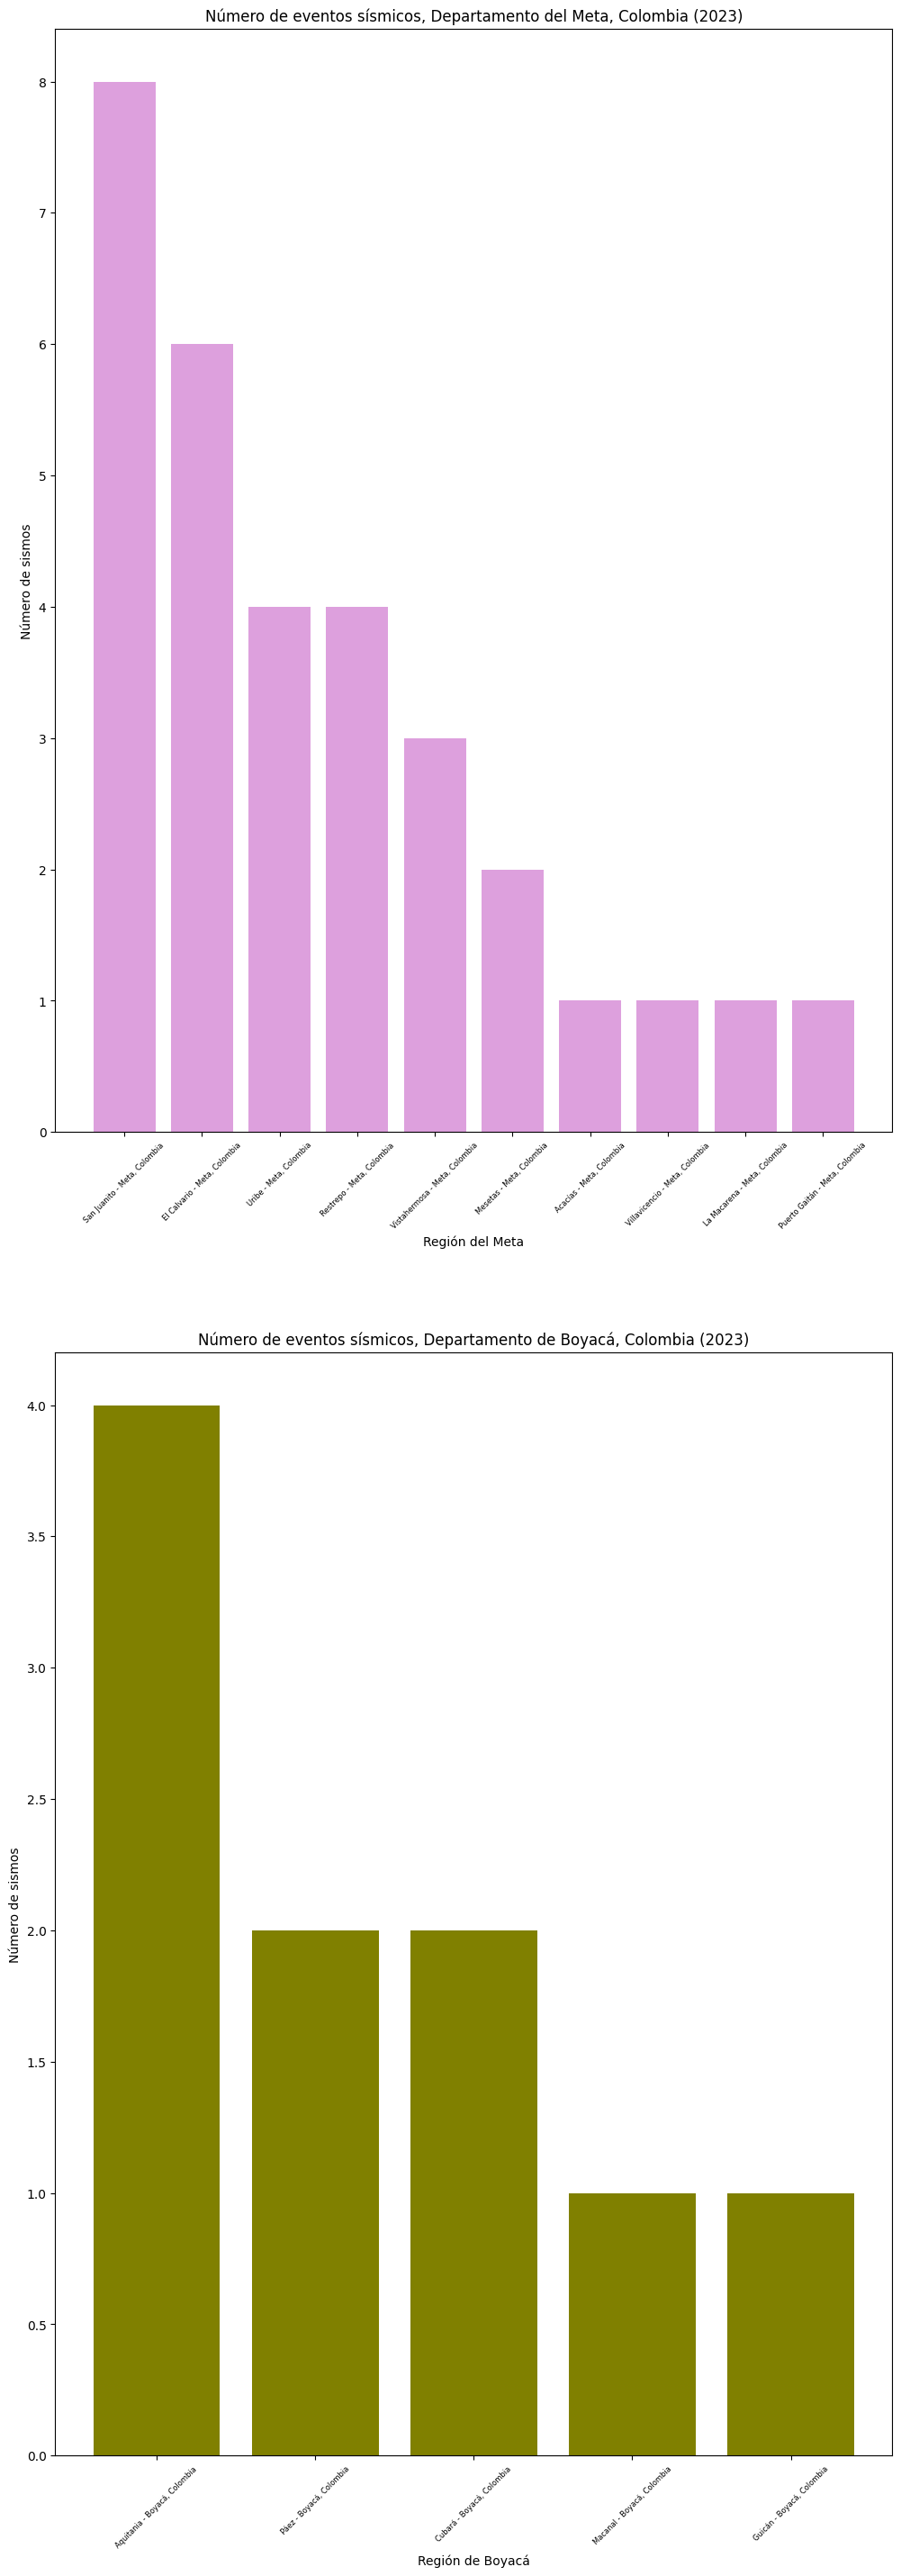

In [18]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize = (12, 35))

event_meta= meta['Region'].value_counts()
ax.bar(event_meta.index, event_meta.values, color='plum')
ax.tick_params(axis='x', rotation=45, labelsize= 6)
ax.set_title('Número de eventos sísmicos, Departamento del Meta, Colombia (2023)')
ax.set_xlabel('Región del Meta')
ax.set_ylabel('Número de sismos')


event_boya= boya['Region'].value_counts()
ax1.bar(event_boya.index, event_boya.values, color='olive')
ax1.tick_params(axis='x', rotation=45, labelsize= 6)
ax1.set_title('Número de eventos sísmicos, Departamento de Boyacá, Colombia (2023)')
ax1.set_xlabel('Región de Boyacá')
ax1.set_ylabel('Número de sismos')

print(event_meta)
print(event_boya)
plt.show()

<font color='white'>Figura 1. Muestra un primer histograma con el número de sismos registrados para el Meta en 2023 en <font color='plum'> rosa claro<font color='white'>. El segundo histograma muestra esta misma información para el Departamente de Boyacá en 2023, en color <font color='olive'> verde oliva<font color='white'>. Se puede observar que en Boyacá se presentaron menos sismos, además de que esto implica menos regiones en las que se registran. En contraste, en el Meta se da mayor cantidad de sismos abarcando más regiones del mismo siendo El Calvario y San Juanito los de más número de eventos.

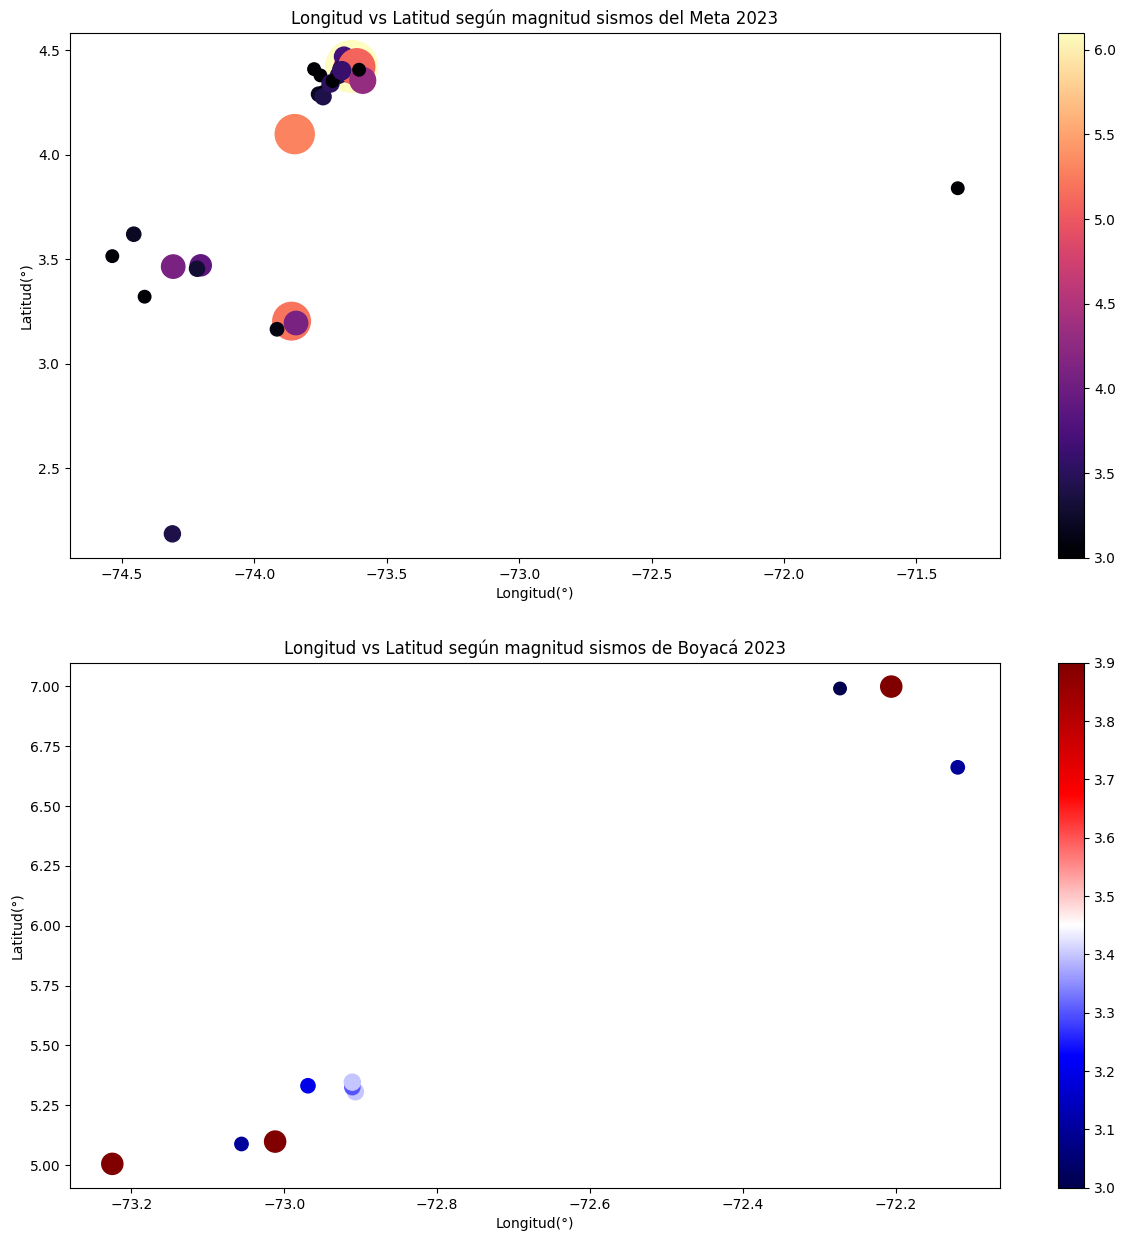

In [5]:
fig, (ax1, ax) = plt.subplots(2, 1, figsize = (15,15))

scat1= ax1.scatter(meta['Long(°)'], meta['Lat(°)'], s= meta['Mag.']**4, c= meta['Mag.'], cmap= 'magma')
ax1.set_title('Longitud vs Latitud según magnitud sismos del Meta 2023')
ax1.set_xlabel('Longitud(°)')
ax1.set_ylabel('Latitud(°)')
fig.colorbar(scat1, ax=ax1, orientation='vertical')

scat= ax.scatter(boya['Long(°)'], boya['Lat(°)'], s= boya['Mag.']**4, c= boya['Mag.'], cmap= 'seismic')
ax.set_title('Longitud vs Latitud según magnitud sismos de Boyacá 2023')
ax.set_xlabel('Longitud(°)')
ax.set_ylabel('Latitud(°)')
fig.colorbar(scat, ax=ax, orientation='vertical')


<font color='white'>Figura 2. Se visualizan datos de Latitud vs. Longitud de los sismos registrados. Para el primer gráfico, con un rango de Longitud entre 74.6° W y 71.4° W, y de Latitud de 2.0° N hasta 4.5° N, los puntos se interpretan en relación a la ubicación sobre un mapa de la región del Departamento del Meta. Para el segundo gráfico, con un rango de Longitud entre 73.3° W y 72.3° W, y de Latitud de 4.5° N hasta 7.0° N, los puntos se interpretan en relación a la ubicación sobre un mapa de la región del Departamento de Boyacá. Para poder distinguir las magnitudes más claramente, los puntos de cada sismo representan este valor elevado a la 4 (`s= datos['Mag.']**4`). De esta forma se observa que las zonas con mayor actividad sísmica para Meta son principalmente al occidente, sin embargo, para Boyacá, la parte nororiental y suroccidental son en las que se dan los eventos. Esto nos permite observar que cerca a municipios como Tasco, en el centro del departamento, no hay actividad sísmica. En adición, el ttamañp de los puntos y su color, indican la magnitud de estos, por lo que se tienen sismos de mayor magnitud en el Meta.

Text(0, 0.5, 'Magnitud')

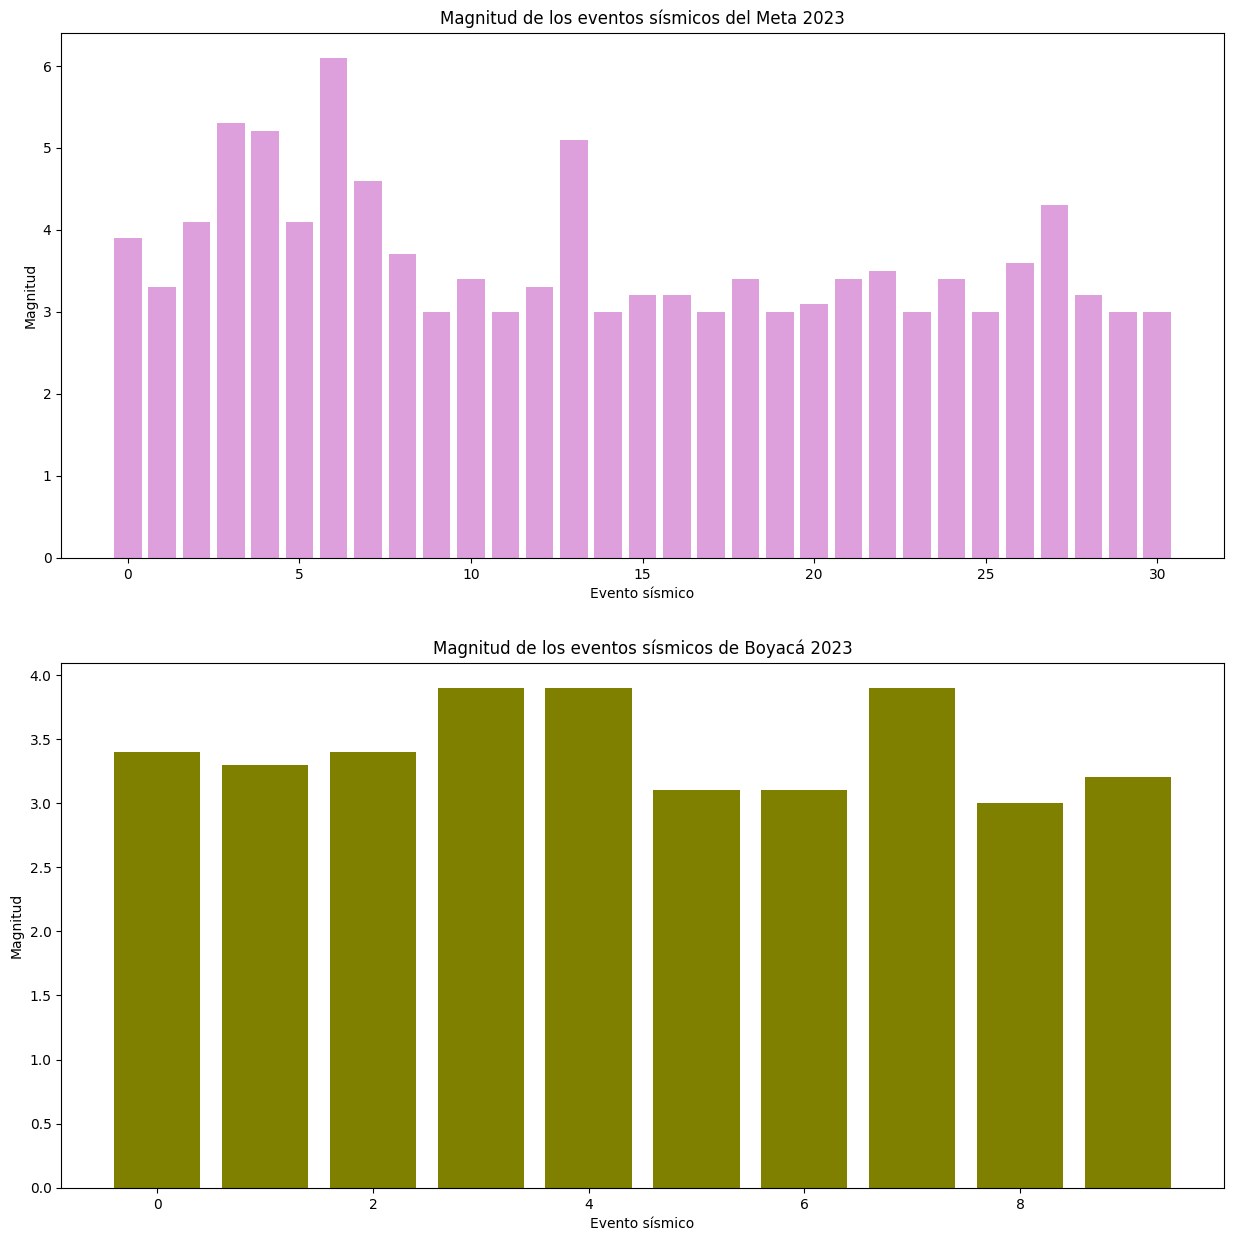

In [16]:
fig, (ax1, ax) = plt.subplots(2, 1, figsize = (15,15))

scat= ax.bar(np.arange(0, len(boya)), boya['Mag.'], color= 'olive')
ax.set_title('Magnitud de los eventos sísmicos de Boyacá 2023')
ax.set_xlabel('Evento sísmico')
ax.set_ylabel('Magnitud')



scat1= ax1.bar(np.arange(0, len(meta)), meta['Mag.'], color= 'plum')
ax1.set_title('Magnitud de los eventos sísmicos del Meta 2023')
ax1.set_xlabel('Evento sísmico')
ax1.set_ylabel('Magnitud')


<font color='white'>Figura 3. Muestra un primer histograma con la magnitud de los sismos registrados para el Meta en 2023 en <font color='plum'> rosa claro<font color='white'>. El segundo histograma muestra esta misma información para el Departamente de Boyacá en 2023, en color <font color='olive'> verde oliva<font color='white'>. Para el Meta, no solo se dieron más eventos sísmicos sino que abarcan magnitudes mayores que los de Boyacá. 

Con la observación de los datos respecto a **número de eventos sísmicos** y **magnitud**, que son los parámetros indicativos primordiales para el desarrollo del *shapemap* en relación a la selección de la información que se utilizará, se puede concluir que a pesar de que se espera obtener un mapa de aceleraciones para Boyacá, no se tiene registro de gran actividad sísmica que sea adecuada para dicho objetivo. Esto se debe a que en el análisis de los sismogramas se espera tener señales claras del evento con poco ruido. Por esto, se selecciona un sismo del Meta, Departamento cercano a Boyacá y con información sismológica ideal para el desarrollo del proyecto.

## <font color='cornflowerblue'>Referencias
- __[Red Sismologica Nacional de Colombia. (s. f.). http://bdrsnc.sgc.gov.co/paginas1/catalogo/Consulta_Experta_Seiscomp/consultaexperta.php](http://bdrsnc.sgc.gov.co/paginas1/catalogo/Consulta_Experta_Seiscomp/consultaexperta.php)__

- __[S. G. Colombiano. Reporte de réplicas del sismo ocurrido en el calvario- meta el 17 de agosto de 2023. SGC, 2023. https://www2.sgc.gov.co/Noticias/tpaginas/Reporte-El-Calvario-Meta-18-08-2023-corte-6pm.pdf](https://www2.sgc.gov.co/Noticias/tpaginas/Reporte-El-Calvario-Meta-18-08-2023-corte-6pm.pdf)__

- __[S. G. Colombiano. Visor de sismos. SGC, 2024. https://saeprod.sgc.gov.co/sismos](https://saeprod.sgc.gov.co/sismos)__